<a href="https://colab.research.google.com/github/MariliaRot/Covid-19/blob/master/COVID_DADOS_DATAFRAME_MS_PAINEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratoria de dados - COVID19 no Ceará
Objetivo = fazer a predição de casos utilizando o modelo SIR (Sucetiveis - Infectados - Recuperados)

Fonte dos dados : Painel Corona Virus - Ministerio da Saude (https://covid.saude.gov.br/)

In [1]:
# Montando o Google Drive para obtenção da base de dados
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


import 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, date
from scipy.integrate import odeint
from scipy.optimize import minimize

In [7]:
caminho_dados_br = '/content/drive/My Drive/Colab Notebooks/PAINEL_MINISTERIO_DA_SAUDE-BR/HIST-COVIDBR-26082020.csv'

dadosBRbruto = pd.read_csv(caminho_dados_br)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
dadosBRbruto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858433 entries, 0 to 858432
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              858433 non-null  int64  
 1   regiao                  858433 non-null  object 
 2   estado                  858249 non-null  object 
 3   municipio               850068 non-null  object 
 4   coduf                   858433 non-null  int64  
 5   codmun                  853281 non-null  float64
 6   codRegiaoSaude          850068 non-null  float64
 7   nomeRegiaoSaude         850068 non-null  object 
 8   data                    858433 non-null  object 
 9   semanaEpi               858433 non-null  int64  
 10  populacaoTCU2019        855220 non-null  object 
 11  casosAcumulado          858433 non-null  int64  
 12  casosNovos              858433 non-null  int64  
 13  obitosAcumulado         858433 non-null  int64  
 14  obitosNovos         

In [14]:
## Quantidade de casos por ESTADO
dadosBRbruto['estado'].value_counts()

MG    130846
SP     99022
RS     74848
BA     64138
PR     61231
SC     45472
GO     37669
PI     34456
PB     34456
MA     33538
PE     28642
CE     28489
RN     25888
PA     22216
MT     21910
TO     21604
AL     15943
RJ     14413
ES     12271
MS     12271
SE     11812
AM      9670
RO      8293
AC      3550
RR      2632
AP      2632
DF       337
Name: estado, dtype: int64

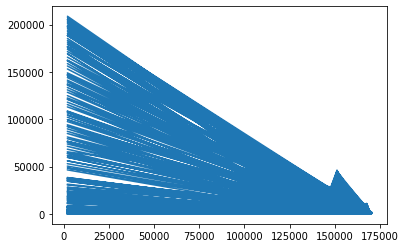

In [101]:
#casosAcumData= dadosBRbruto.filter(items=['casosAcumulado','estado','data']).where(dadosBRbruto.estado =='CE').sort_values(by='casosAcumulado', ascending=True)
#casosAcumData

casosAcumDataCE = dadosBRbruto[dadosBRbruto["estado"] == 'CE']
data = casosAcumDataCE.filter(items=['casosAcumulado','data','obitosAcumulado']).where(dadosBRbruto.casosAcumulado > 0).sort_values(by='data', ascending=True)
data['casosAcumulado'].plot(x="data")

In [96]:
#casosAcumData= dadosBRbruto.filter(items=['casosAcumulado','estado','data']).where(dadosBRbruto.estado =='CE').sort_values(by='casosAcumulado', ascending=True)
#casosAcumData

casosAcumDataCE = dadosBRbruto[dadosBRbruto["estado"] == 'CE']
data = casosAcumDataCE.filter(items=['data']).where(dadosBRbruto.casosAcumulado > 0).sort_values(by='data', ascending=True)
casos = casosAcumDataCE.filter(items=['casosAcumulado']).where(dadosBRbruto.casosAcumulado > 0).sort_values(by='casosAcumulado', ascending=True)
mortos= casosAcumDataCE.filter(items=['obitosAcumulado']).sort_values(by='obitosAcumulado', ascending=True)
casosAcumCE_datas = data.dropna()
casosAcumCE_casos = casos.dropna()
casosAcumCE_mortos = mortos.dropna()
casosAcumCE_datas = data.drop_duplicates()
casosAcumCE_casos = casos.drop_duplicates()
casosAcumCE_mortos= casosAcumCE_mortos.drop_duplicates()

In [97]:
mortos

,obitosAcumulado
1840,0
154374,0
154375,0
154376,0
154377,0
...,...
2019,8286
2020,8289
2021,8292
2022,8339


In [78]:
#colocando dados casos acumludados e suas datas em arrays

yy =casosAcumCE_casos['casosAcumulado'].tolist()
xx = casosAcumCE_datas['data'].tolist()

ydata =np.array(yy)
xdata = np.array(xx)
mortos = 

len(xdata)

164

In [79]:
len(ydata)

2536

In [81]:
# Total population, N.
N = 9187103 
# número inicial de infectados e mortos
I0, M0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - M0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
#beta, gamma = 1.0E-3,1.0E-3 

t = np.linspace(start = 1, stop = 164, num = 164)

print(t)
print(ydata.shape[0])
print(xdata.shape[0])

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164.]
2536
164


In [ ]:
def deriv(y, t, N, beta, gamma):
    S, I, M = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dMdt = gamma * I
    return dSdt, dIdt, dMdt

def obj(x):
  y0 = S0, I0, M0
  ret = odeint(deriv, y0, t, args=(N, x[0], x[1]))
  S, I, M = ret.T  
  return linalg.norm(I-ydata) +linalg.norm(M-mortos)

x0 = np.array([10,10])
result = minimize(obj, x0, method='Nelder-Mead', tol=1e-7)
print(result.fun,result.x)

beta = result.x[0]
gamma = result.x[1]
# Initial conditions vector
y0 = S0, I0, M0
#time
t2 = np.linspace(start = 1, stop = 160, num = 160)
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, M = ret.T